2. Using Principal component analysis perform the dimensionality reduction on the given dataset and anayze the performance

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import seaborn as sns

In [2]:
df = load_iris()
x = pd.DataFrame(df.data)
y = pd.DataFrame(df.target)

In [3]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(x))
scaled_data.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


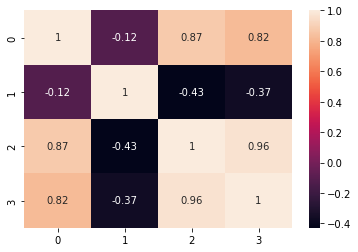

In [4]:
dataplot = sns.heatmap(x.corr(),annot=True)

In [5]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=3)
reduced_data = pd.DataFrame(pca.fit_transform(scaled_data))
reduced_data.head()

,0,1,2
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(reduced_data,y[0], test_size=0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.69      0.78        13
           2       0.67      0.89      0.76         9

    accuracy                           0.83        30
   macro avg       0.86      0.86      0.85        30
weighted avg       0.86      0.83      0.83        30

